In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/home/arnavgupta829/Desktop/ELL409/Assignment2/OldFaithful.csv')
raw_ = []
for i in data.columns:
    raw_.append(data[i])
raw = np.asarray(raw_)
raw = raw.transpose()

In [22]:
class Kmeans:
    
    def __init__(self, k, iterations, dim, nos, batchSize):
        self.k = k
        self.iterations = iterations
        self.dim = dim
        self.nos = nos
        self.batchSize = batchSize
        self.centroids = []
        self.samplesForEachCluster = []
        self.labels = np.zeros(batchSize)
        self.finalLabels = np.zeros(nos)
        
    def initialiseCentroids(self, datapoints):
        np.random.shuffle(datapoints)
        for i in range(0, self.k):
            self.centroids.append(datapoints[i])
            self.samplesForEachCluster.append(0)
     
    def computeDistance(self, centroid, datapoint):
        return np.linalg.norm(centroid-datapoint)
    
    def assignFinalLabels(self, datapoints):
        for i in range(0, len(datapoints)):
            distances = []
            for j in range(0, self.k):
                distances.append(self.computeDistance(self.centroids[j], datapoints[i]))
            self.finalLabels[i] = (np.argmin(distances, axis = 0))
    
    def assignLabels(self, datapoints):
        for i in range(0, len(datapoints)):
            distances = []
            for j in range(0, self.k):
                distances.append(self.computeDistance(self.centroids[j], datapoints[i]))
            self.labels[i] = (np.argmin(distances, axis = 0))
    
    def converge(self, datapoints):
        self.initialiseCentroids(datapoints)
        for i in range(0, self.iterations):
            np.random.shuffle(datapoints)
            batch = []
            for j in range(0, self.batchSize):
                batch.append(datapoints[j])
            self.assignLabels(batch)
            for j in range(0, self.batchSize):
                self.samplesForEachCluster[int(self.labels[j])] += 1
                eta = 1/self.samplesForEachCluster[int(self.labels[j])]
                self.centroids[int(self.labels[j])] = ((1-eta)*self.centroids[int(self.labels[j])]) + (eta*datapoints[j])
        self.assignFinalLabels(datapoints)

[array([ 4.29315385, 80.28044872]), array([ 2.08242553, 54.54521277])]
[0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0.]
[array([ 4.29315385, 80.28044872]), array([ 2.08242553, 54.54521277])]


Text(0.5, 1.0, 'Visualization of clustered data')

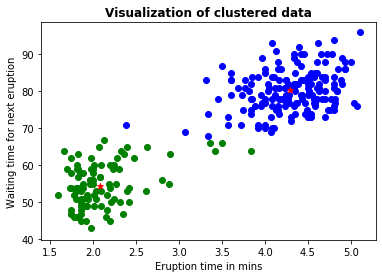

In [28]:
kmeans = Kmeans(2, 100, len(raw[0]), len(raw), 10)
kmeans.converge(raw)
print(kmeans.centroids)
print(kmeans.finalLabels)
x0 = []
y0 = []
x1 = []
y1 = []
for i in range(0, kmeans.nos):
    if(kmeans.finalLabels[i] == 0):
        x0.append(raw[i, 0])
        y0.append(raw[i, 1])
    else:
        x1.append(raw[i, 0])
        y1.append(raw[i, 1])
print(kmeans.centroids)
plt.scatter(x0, y0, c="blue")
plt.scatter(x1, y1, c="green")
plt.scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], marker="*", c="red")
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time for next eruption')
plt.title('Visualization of clustered data', fontweight='bold')